<a href="https://colab.research.google.com/github/colacan100/Algorithm_Study/blob/main/n113a_data_manipulation_ipynb_1%EC%B0%A8_%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자본총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

```py
힌트 : 

- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정 (종목명은 Lecture Note를 참조)
- 이후 `concat`으로 합치기
- 합친 이후의 index는 `분기`로 설정 및 drop

이라는 단계를 거치면 될겁니다.
```

In [ ]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header
    df= df.loc[:,['매출액','자본총계','EPS(원)']]
    return df[-1:]
df1 = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df1 = df1.reset_index()
df2 = pd.DataFrame({
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림']}
)
df = pd.concat([df1, df2], axis = 1)
df = df.rename(columns = {'index' : '분기'})
df = df.set_index('분기')
print(df.shape)
df

(6, 4)


,매출액,자본총계,EPS(원),종목명
분기,,,,
2020/09\n(IFRS연결),"6,243","10,897",453,하이트진로
2020/09\n(IFRS연결),205,816,3,보해양조
2020/09\n(IFRS연결),"5,980","12,096","1,682",롯데칠성
2020/09\n(IFRS연결),521,624,-61,마니커
2020/06\n(IFRS연결),"4,108","7,534","1,168",이지홀딩스
2020/09\n(IFRS연결),"2,613","2,695",62,하림


## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




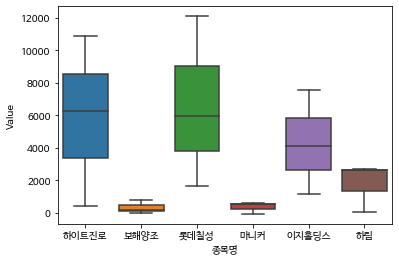

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
df_tidy = df.melt(id_vars = '종목명', value_vars = ['매출액', '자본총계','EPS(원)'])
df_tidy = df_tidy.rename(columns = {'variable' : 'Feature'})
df_tidy = df_tidy.rename(columns = {'value' : 'Value'})
def toInt(string):
    return int(string.replace(',',''))
df_tidy['Value'] = df_tidy['Value'].apply(toInt)
import seaborn as sns
sns.boxplot(data = df_tidy, x = '종목명', y = 'Value');
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [ ]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

left.merge(right, how = 'left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|에스엘바이오닉스|...|...|...|...|
|오성첨단소재|...|...|...|...|
|우리바이오|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [ ]:
import pandas as pd
import seaborn as sns

# csv : 콤마로 데이터를 구분해서 저장하는 방법
# 자본총계 : 자산총계에서 부채총계를 뺀 값
# EPS : 주당순이익
# 따라서 매출액, 자산총계, 부채총계, 주당순이익을 바탕으로 데이터프레임을 만든다
# 최종 분기에 해당하는 데이터
dat = pd.DataFrame({"종목명" : ['팬오션','KSS해운','대한해운','흥하해운','HMM','한국비엔씨','에스엘바이오닉스','오성첨단소재','우리바이오','마이더스AI','애머릿지']
                    ,"매출액" : [13282,867,3097,40164,193,54,60,203,177,243,3929]
                    ,"자본총계" : [28006,2866,8533,-263,16886,370,470,1944,1451,384,317]
                    ,"EPS(원)" : [582,1701,733,64,7939,-3694,-3119,41,518,-306,-46]})
# 테마별 평균 데이터를 결과물로 만드는 코드
dat.loc[:,'테마'] = ['해운','해운','해운','해운','해운','마리화나(대마)','마리화나(대마)','마리화나(대마)','마리화나(대마)','마리화나(대마)','마리화나(대마)']
mean = round(dat.groupby("테마").mean(),2)
mean = mean.reset_index()
mean

,테마,매출액,자본총계,EPS(원)
0,마리화나(대마),777.67,822.67,-1101.0
1,해운,11520.60,11205.60,2203.8


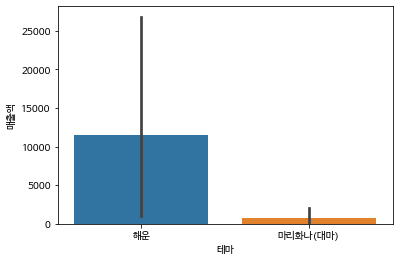

In [ ]:
sns.barplot(x = '테마', y = '매출액', data = dat);

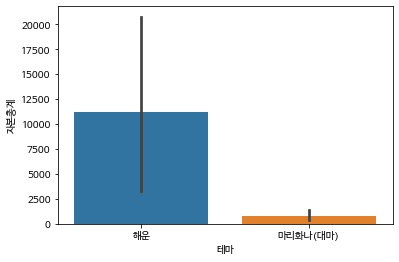

In [ ]:
sns.barplot(x = '테마', y = '자본총계', data = dat);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


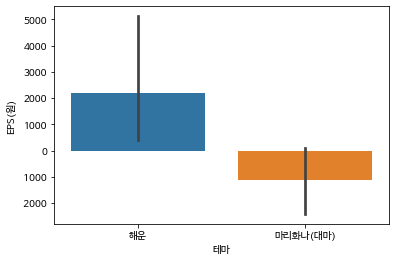

In [ ]:
sns.barplot(x = '테마', y = 'EPS(원)', data = dat);